In [333]:
import numpy as np
import pandas as pd

In [334]:
df=pd.read_csv('Crop_recommendation.csv')

In [335]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [336]:
df.shape

(2200, 8)

### 1. Data Cleaning


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [339]:
## check for null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [340]:
## check for duplicate values
df.duplicated().sum()

0

In [341]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [342]:
## Label Encoding the target column
df.label.unique().size     # total number of unique values in target column

22

### EDA

In [344]:
## distribution of crops
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

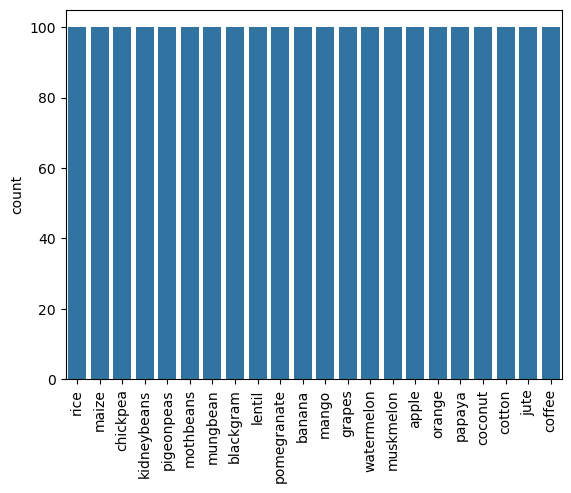

In [346]:
sns.barplot(x=df['label'].unique(),y=df['label'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [347]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [348]:
df[df['label']=='rice'].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,79.890000,47.580000,39.870000,23.689332,82.272822,6.425471,236.181114
std,11.917981,7.904966,2.946167,2.031272,1.418381,0.768692,34.291825
min,60.000000,35.000000,35.000000,20.045414,80.122675,5.005307,182.561632
25%,69.000000,41.000000,38.000000,21.927064,80.952094,5.869992,204.334023
50%,80.000000,47.000000,40.000000,23.734837,82.189357,6.363804,233.119859
75%,91.000000,54.250000,42.000000,25.513702,83.470254,7.039147,264.126903
max,99.000000,60.000000,45.000000,26.929951,84.969072,7.868475,298.560117


In [349]:
df[df['label']=='rice'].N.mean()

79.89

In [350]:
df[df['label']=='rice'].N

0     90
1     85
2     60
3     74
4     78
      ..
95    88
96    93
97    60
98    78
99    65
Name: N, Length: 100, dtype: int64

In [351]:
df[df['label']=='maize'].N.mean()

77.76

In [352]:
df[df['label']=='maize'].N

100    71
101    61
102    80
103    73
104    61
       ..
195    90
196    67
197    60
198    83
199    83
Name: N, Length: 100, dtype: int64

In [353]:
df.groupby('label')[['N','P','K','temperature','humidity','ph','rainfall']].mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


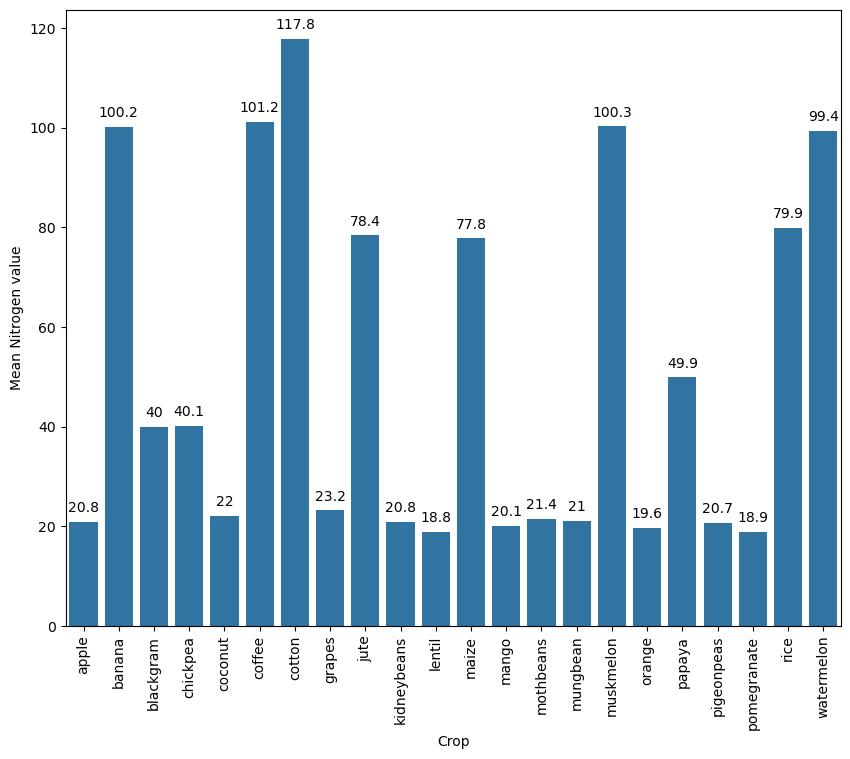

In [354]:
plt.figure(figsize=(10,8))
ax=sns.barplot(df.groupby('label')['N'].mean().round(1))
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=5)

plt.ylabel('Mean Nitrogen value')
plt.xlabel('Crop')
plt.show()

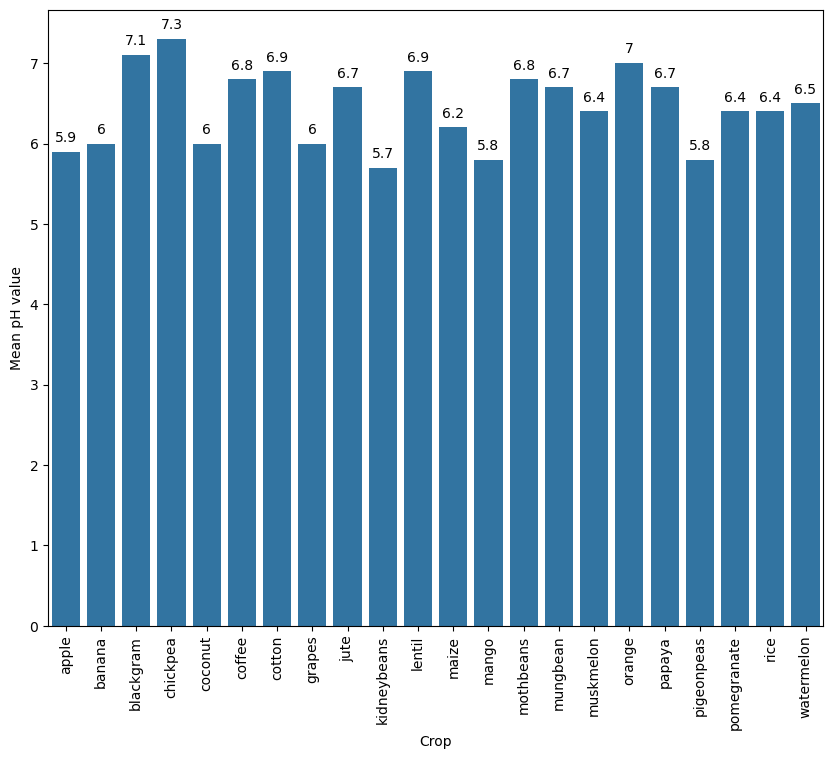

In [355]:
plt.figure(figsize=(10,8))
ax=sns.barplot(df.groupby('label')['ph'].mean().round(1))
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=5)

plt.ylabel('Mean pH value')
plt.xlabel('Crop')
plt.show()

In [356]:
df.drop(columns=('label')).corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


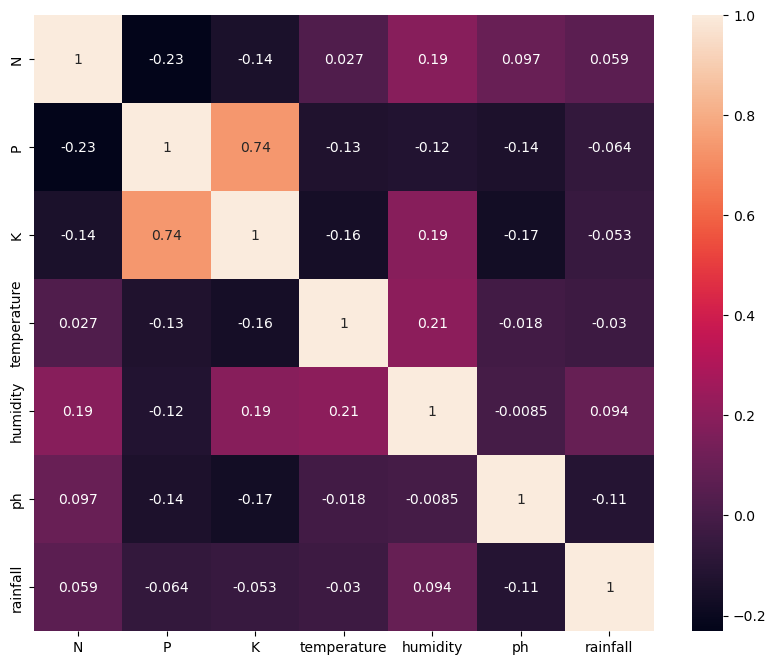

In [357]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns='label').corr(),annot=True)
plt.show()

### Preprocessing

In [359]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [360]:
df['label']=encoder.fit_transform(df.label)

In [361]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [362]:
df.label.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [363]:
pd.DataFrame(encoder.inverse_transform(df.label))[0].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: xlabel='N', ylabel='Count'>

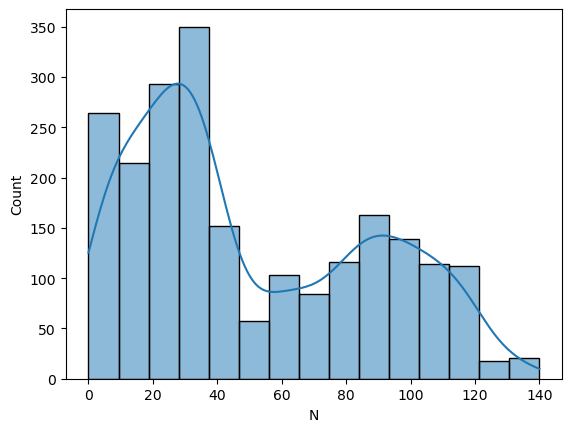

In [364]:
sns.histplot(df.N,kde=True)

<Axes: xlabel='K', ylabel='Count'>

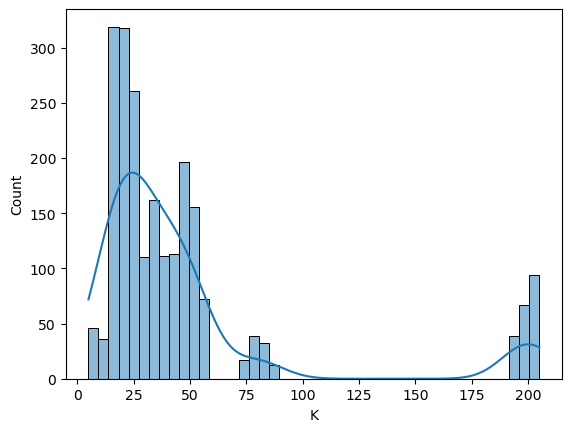

In [365]:
sns.histplot(df.K,kde=True)

In [366]:
X=df.drop(columns=('label'))
y=df.label

In [367]:
X


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [368]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [369]:
# Train_Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [370]:
X_train


,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [371]:
y_train

1656    16
752      2
892     10
1041     1
1179    12
        ..
1638    16
1095     1
1130    12
1294     7
860     10
Name: label, Length: 1760, dtype: int32

In [372]:
# feature scaling
from sklearn.preprocessing  import MinMaxScaler
ms=MinMaxScaler()

In [373]:
X_train=ms.fit_transform(X_train)
X_test=ms.transform(X_test)

In [374]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [375]:
y_train

1656    16
752      2
892     10
1041     1
1179    12
        ..
1638    16
1095     1
1130    12
1294     7
860     10
Name: label, Length: 1760, dtype: int32

### Model Training

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [378]:
models={
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes':          GaussianNB(),
    'Support Vector Machine': SVC(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree':       DecisionTreeClassifier(),
    'Extra Tree':          ExtraTreeClassifier(),
    'Random Forest':       RandomForestClassifier(),
    'Bagging':             BaggingClassifier(),
    'Gradient Boosting':   GradientBoostingClassifier(),
    'Ada Boost':           AdaBoostClassifier()
}

In [379]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    print(f'{name} accuracy score: ',accuracy_score(y_test,y_pred))

Logistic Regression accuracy score:  0.9181818181818182
Naive Bayes accuracy score:  0.9954545454545455
Support Vector Machine accuracy score:  0.9681818181818181
K Nearest Neighbors accuracy score:  0.9681818181818181
Decision Tree accuracy score:  0.9840909090909091
Extra Tree accuracy score:  0.8613636363636363
Random Forest accuracy score:  0.9931818181818182
Bagging accuracy score:  0.9863636363636363
Gradient Boosting accuracy score:  0.9818181818181818


C:\Users\himal shah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost accuracy score:  0.09545454545454546


In [380]:
# cross validation score
from sklearn.model_selection import cross_val_score, ShuffleSplit
# cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)

In [381]:
cross_val=cross_val_score(LogisticRegression(),X_train,y_train,cv=5)

In [382]:
cross_val

array([0.92897727, 0.92897727, 0.95170455, 0.91761364, 0.93181818])

In [383]:
cross_val.mean()

0.9318181818181819

In [384]:
for name, model in models.items():
    cross_val=cross_val_score(model,X_train,y_train,cv=5)
    print(f'Cross validation scores for {name} is: ')
    print(cross_val)
    print('and mean cross validation score is:',cross_val.mean())
    print('\n')
    

Cross validation scores for Logistic Regression is: 
[0.92897727 0.92897727 0.95170455 0.91761364 0.93181818]
and mean cross validation score is: 0.9318181818181819


Cross validation scores for Naive Bayes is: 
[0.99147727 0.99715909 0.99147727 1.         0.99715909]
and mean cross validation score is: 0.9954545454545455


Cross validation scores for Support Vector Machine is: 
[0.97443182 0.98295455 0.98579545 0.99147727 0.98579545]
and mean cross validation score is: 0.984090909090909


Cross validation scores for K Nearest Neighbors is: 
[0.98579545 0.97727273 0.97727273 0.99147727 0.98011364]
and mean cross validation score is: 0.9823863636363637


Cross validation scores for Decision Tree is: 
[0.98295455 0.98579545 0.98011364 0.99715909 0.98011364]
and mean cross validation score is: 0.9852272727272726


Cross validation scores for Extra Tree is: 
[0.95170455 0.91193182 0.89204545 0.94886364 0.94602273]
and mean cross validation score is: 0.9301136363636363


Cross validation sc

C:\Users\himal shah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\himal shah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\himal shah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\himal shah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

Cross validation scores for Ada Boost is: 
[0.19034091 0.19034091 0.19318182 0.14772727 0.19318182]
and mean cross validation score is: 0.18295454545454545




C:\Users\himal shah\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [385]:
# Going forward with Random Forest

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9931818181818182

In [400]:
X_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

In [397]:
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [448]:
def recommend(N,P,K,temperature, humidity, ph, rainfall):
    data=(N,P,K,temperature, humidity, ph, rainfall)
    data=np.array(data).reshape(1,-1)
    data=ms.transform(data)
    y_pred=rf.predict(data)
    return encoder.inverse_transform(y_pred)

In [450]:
recommend(90,42,43,20.879744,82.002744,6.502985,202.935536)

C:\Users\himal shah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)

In [452]:
import pickle

with open('crop_recommendation_model.pickle','wb') as model_file:
    pickle.dump(rf,model_file)

with open('min_max_scaler.pickle','wb') as scaler_file:
    pickle.dump(ms,scaler_file)

with open('label_encoder.pickle','wb') as encoder_file:
    pickle.dump(encoder,encoder_file)

In [ ]:
print('hello world')